<a href="https://colab.research.google.com/github/gyeongdong13/Project/blob/main/%EC%A7%80%EC%A0%90%EB%B3%84_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
0% [1 fonts-nanum 14.2 kB/10.3 MB 0%]

In [ ]:
bank_location = pd.read_csv('/content/drive/MyDrive/데이터 청년 캠퍼스/농협 프로젝트/데이터 모음/지점별 특성 정보.csv', encoding='utf-8')

bank_location.head()

,사무소명,소득수준,반경 0.5km 내 버스정류장,가장 가까운 지하철 거리,반경 3km 내 공동주택 개수,반경 3km 내 공동주택 동 개수,반경 3km 내 공동주택 세대수,"반경 2km 내 마트,백화점,시장 개수","반경 2km 내 마트,백화점,시장 평균 거리",반경 1km 내 병원 개수,반경 2km 내 학교(초중고) 개수,반경 3km 내 대학교 개수,가장 가까운 경쟁사까지의 거리(km),반경 1km 내 경쟁사 지점 개수
0,수원축산농협 고등동지점,2864.370,22,0.8,110,896,68902,44,1.308281,290,23,0,0.487098,7
1,수원축산농협 곡반정지점,6541.860,9,1.6,103,968,72597,11,1.132557,135,20,0,1.182925,0
2,수원축산농협 궐동지점,5618.840,10,1.3,61,545,44712,3,1.699052,94,18,1,0.814212,1
3,수원축산농협 기안지점,2949.495,20,2.4,59,490,40722,5,0.610026,62,10,3,1.534418,0
4,수원축산농협 남수원지점,3030.085,12,0.4,81,917,55756,16,1.379620,170,18,0,0.654604,2


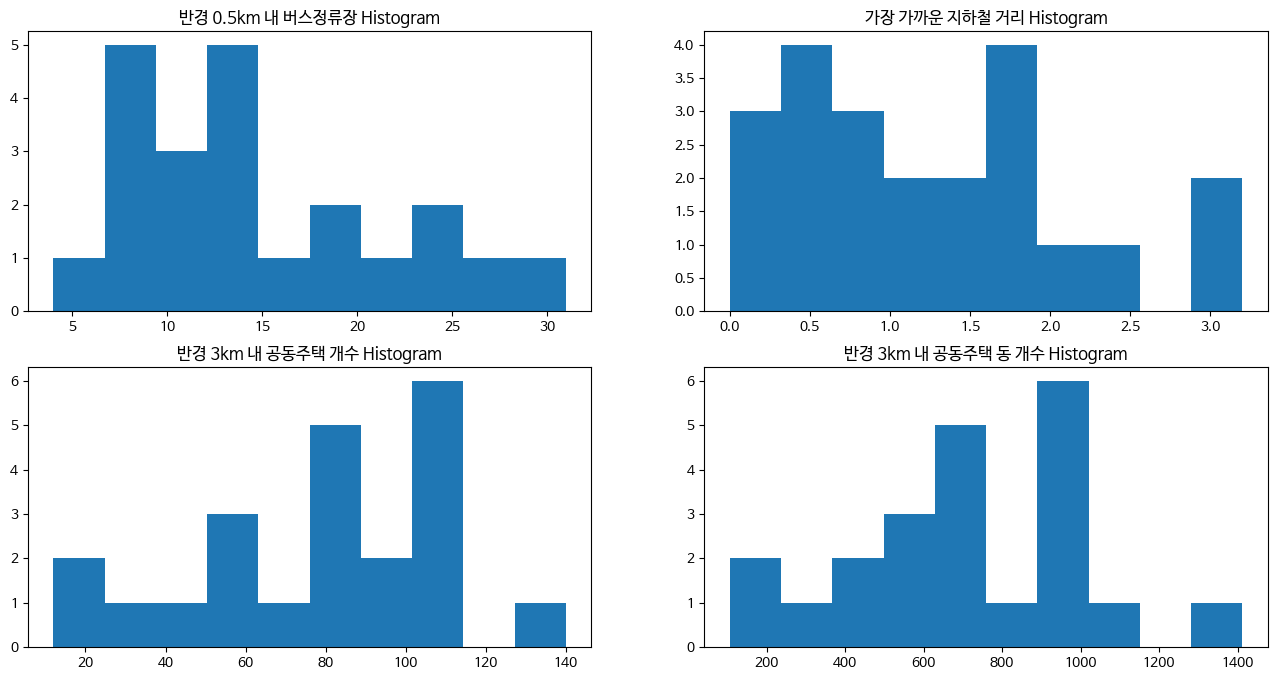

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

plt.rc('font', family='NanumBarunGothic') # 나눔고딕 폰트 사용

import warnings
warnings.filterwarnings('ignore')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(16, 8), nrows=2, ncols=2)

ax1.set_title("반경 0.5km 내 버스정류장 Histogram")
ax1.hist(bank_location["반경 0.5km 내 버스정류장"])

ax2.set_title("가장 가까운 지하철 거리 Histogram")
ax2.hist(bank_location["가장 가까운 지하철 거리"])

ax3.set_title("반경 3km 내 공동주택 개수 Histogram")
ax3.hist(bank_location["반경 3km 내 공동주택 개수"])

ax4.set_title("반경 3km 내 공동주택 동 개수 Histogram")
ax4.hist(bank_location["반경 3km 내 공동주택 동 개수"])

plt.show()

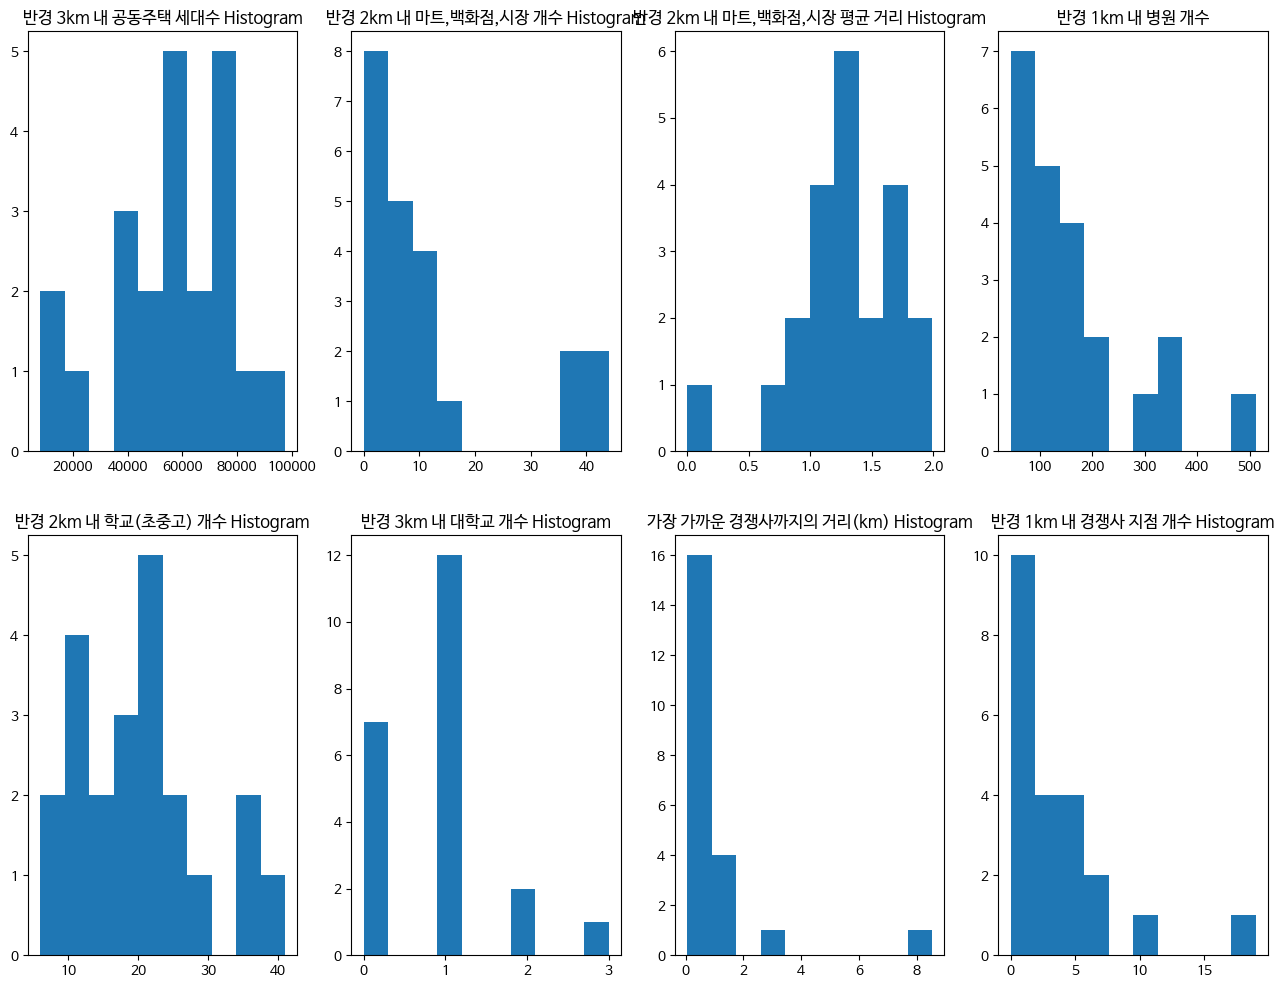

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(figsize=(16, 12), nrows=2, ncols=4)
ax1.set_title("반경 3km 내 공동주택 세대수 Histogram")
ax1.hist(bank_location["반경 3km 내 공동주택 세대수"])

ax2.set_title("반경 2km 내 마트,백화점,시장 개수 Histogram")
ax2.hist(bank_location["반경 2km 내 마트,백화점,시장 개수"])

ax3.set_title("반경 2km 내 마트,백화점,시장 평균 거리 Histogram")
ax3.hist(bank_location["반경 2km 내 마트,백화점,시장 평균 거리"])

ax4.set_title("반경 1km 내 병원 개수")
ax4.hist(bank_location["반경 1km 내 병원 개수"])

ax5.set_title("반경 2km 내 학교(초중고) 개수 Histogram")
ax5.hist(bank_location["반경 2km 내 학교(초중고) 개수"])

ax6.set_title("반경 3km 내 대학교 개수 Histogram")
ax6.hist(bank_location["반경 3km 내 대학교 개수"])

ax7.set_title("가장 가까운 경쟁사까지의 거리(km) Histogram")
ax7.hist(bank_location["가장 가까운 경쟁사까지의 거리(km)"])

ax8.set_title("반경 1km 내 경쟁사 지점 개수 Histogram")
ax8.hist(bank_location["반경 1km 내 경쟁사 지점 개수"])

plt.show()

<Axes: >

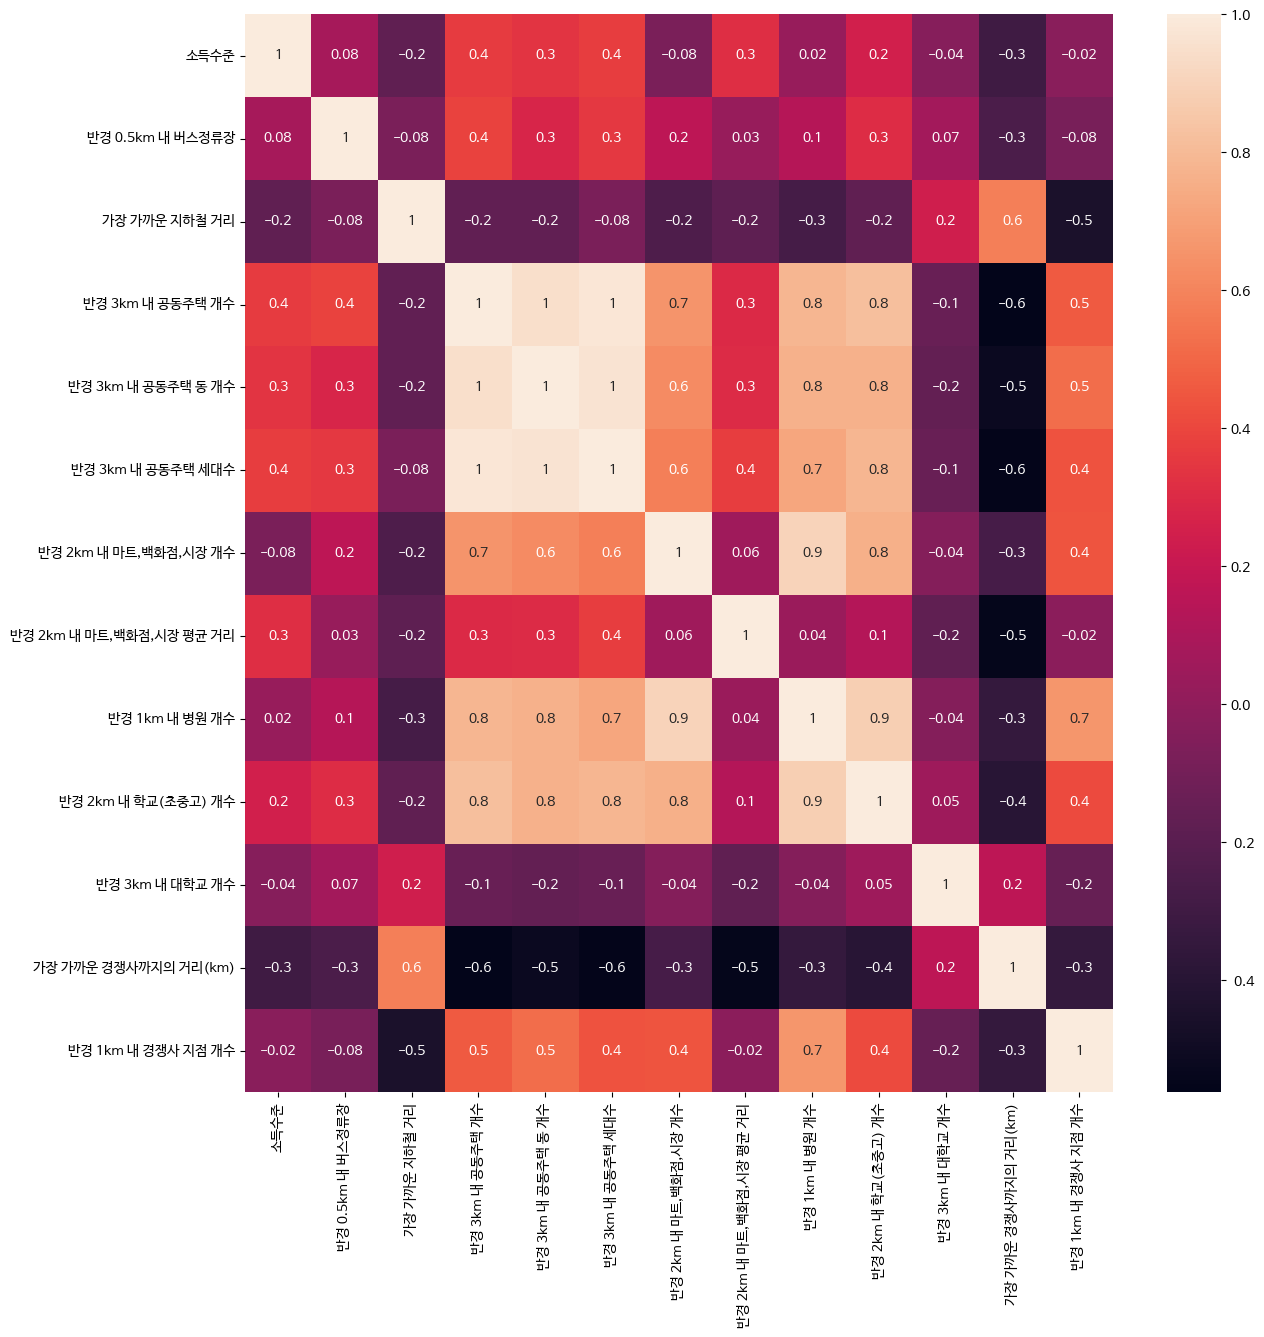

In [ ]:
X_features = bank_location.drop("사무소명", axis=1)

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".1g")

# **Standard Scaler + PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler


# 데이터프레임의 변수들을 스케일링
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_features)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_pca = pca.fit_transform(scaled_df)
print("PCA component별 설명률 :", pca.explained_variance_ratio_)
print("PCA component가 설명하는 총 분산 합 :", pca.explained_variance_ratio_.sum())

PCA component별 설명률 : [0.45966888 0.13902978 0.11453908 0.07595677 0.06723177]
PCA component가 설명하는 총 분산 합 : 0.8564262757230872


In [ ]:
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4
0,-2.601914,0.900059,0.867619,0.380055,1.522002
1,-0.793987,-1.286935,-0.929729,-1.886699,-0.392111
2,0.962857,-1.688242,-0.425879,-0.570681,-1.283122
3,2.455095,1.503282,-1.805139,1.614136,-0.952094
4,-0.436990,-0.475745,1.083960,-0.317522,0.785379


Text(0, 0.5, '주성분')

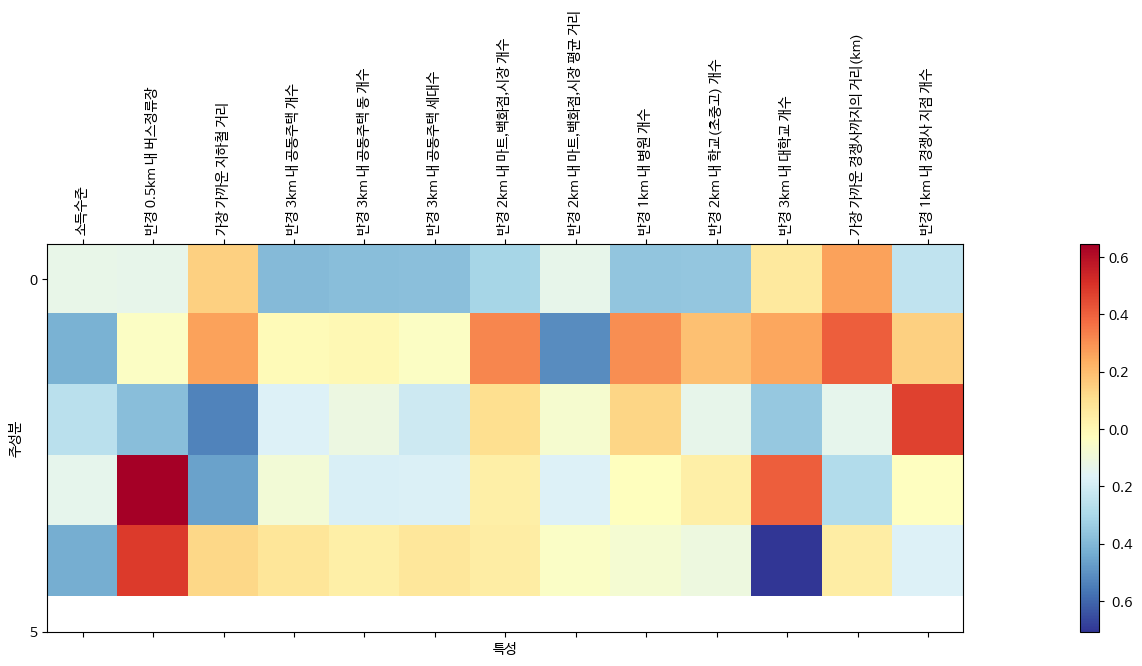

In [ ]:
plt.figure(figsize=(30,5))
plt.matshow(pca.components_, cmap="RdYlBu_r", fignum=1)
plt.yticks([0,5]) # 세로축 축 값
plt.colorbar() # 상관계수 bar
plt.xticks(range(len(X_features.columns)), X_features.columns, rotation=90)
plt.xlabel("특성")
plt.ylabel("주성분")

**앞선 주성분일수록, 그 주성분과 상관성이 높을수록 다른 변수보다 변별력이 높다고 해석가능**

---

**어느 주성분에서도 미미하다면 변별력이 상대적으로 낮다고 해석**


# 군집화

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

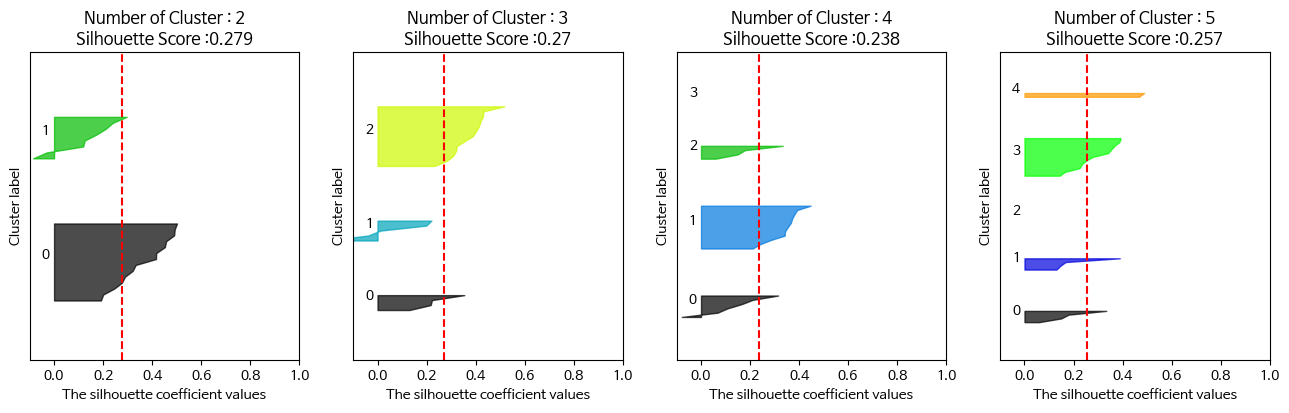

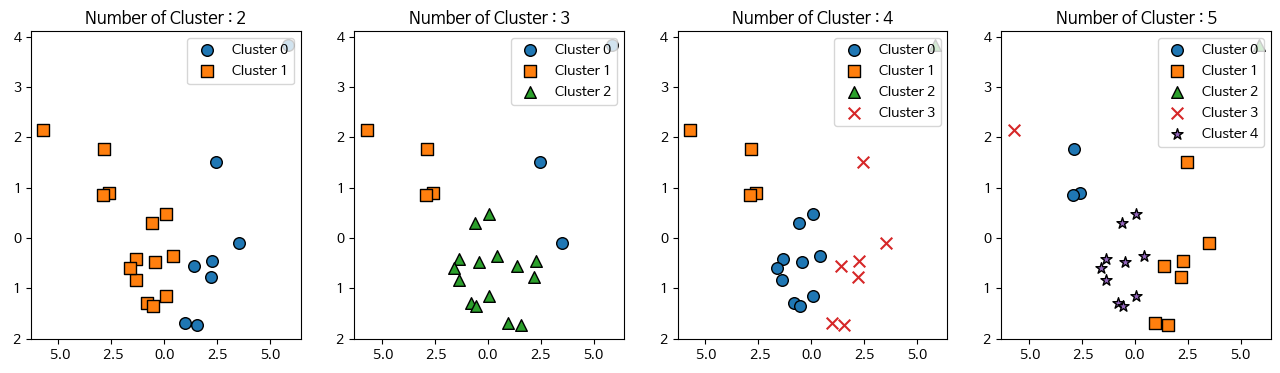

In [ ]:
visualize_silhouette([2,3,4,5],X_pca)
visualize_kmeans_plot_multi([2,3,4,5],X_pca)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_pca)
bank_location["cluster_label"] = labels
bank_location

,사무소명,소득수준,반경 0.5km 내 버스정류장,가장 가까운 지하철 거리,반경 3km 내 공동주택 개수,반경 3km 내 공동주택 동 개수,반경 3km 내 공동주택 세대수,"반경 2km 내 마트,백화점,시장 개수","반경 2km 내 마트,백화점,시장 평균 거리",반경 1km 내 병원 개수,반경 2km 내 학교(초중고) 개수,반경 3km 내 대학교 개수,가장 가까운 경쟁사까지의 거리(km),반경 1km 내 경쟁사 지점 개수,cluster_label
0,수원축산농협 고등동지점,2864.370000,22,0.80,110,896,68902,44,1.308281,290,23,0,0.487098,7,2
1,수원축산농협 곡반정지점,6541.860000,9,1.60,103,968,72597,11,1.132557,135,20,0,1.182925,0,1
2,수원축산농협 궐동지점,5618.840000,10,1.30,61,545,44712,3,1.699052,94,18,1,0.814212,1,0
3,수원축산농협 기안지점,2949.495000,20,2.40,59,490,40722,5,0.610026,62,10,3,1.534418,0,0
4,수원축산농협 남수원지점,3030.085000,12,0.40,81,917,55756,16,1.379620,170,18,0,0.654604,2,1
5,수원축산농협 남양지점,2484.177000,4,0.00,20,138,11616,1,0.852126,56,6,1,0.569505,4,0
6,수원축산농협 동탄목동지점,1962.000000,14,3.10,69,756,64715,1,1.847919,54,10,0,1.416064,0,1
7,수원축산농협 동탄테크노밸리지점,4693.290000,10,1.20,81,702,59521,5,1.646202,145,18,0,0.163164,10,1
8,수원축산농협 발안지점,2526.345000,14,0.00,31,303,22631,5,0.920877,68,12,0,0.253779,4,0
9,수원축산농협 병점지점,4548.180000,26,0.60,97,945,72408,4,1.197593,132,23,1,0.144704,6,1


In [ ]:
pd.DataFrame(bank_location.groupby("cluster_label")["사무소명"].value_counts())

사무소명
cluster_label 사무소명                  
0             수원축산농협 궐동지점          1
              수원축산농협 기안지점          1
              수원축산농협 남양지점          1
              수원축산농협 발안지점          1
              수원축산농협 세교지점          1
              수원축산농협 오목천지점         1
1             수원축산농협 곡반정지점         1
              수원축산농협 남수원지점         1
              수원축산농협 동탄목동지점        1
              수원축산농협 동탄테크노밸리지점     1
              수원축산농협 병점지점          1
              수원축산농협 삼환지점          1
              수원축산농협 오산지점          1
              수원축산농협 율전동지점         1
              수원축산농협 진안지점          1
              수원축산농협 탑동지점          1
              수원축산농협 파장동지점         1
2             수원축산농협 고등동지점         1
              수원축산농협 수원시청역지점       1
              수원축산농협 정자동지점         1
              수원축산농협 화서동지점         1
3             수원축산농협 송산그린시티지점      1

In [ ]:
pd.DataFrame(bank_location.groupby("cluster_label")["반경 3km 내 공동주택 세대수"].mean())

,반경 3km 내 공동주택 세대수
cluster_label,
0,33599.166667
1,64222.909091
2,79077.000000
3,8029.000000


In [ ]:
pd.DataFrame(bank_location.groupby("cluster_label")["가장 가까운 경쟁사까지의 거리(km)"].mean())

,가장 가까운 경쟁사까지의 거리(km)
cluster_label,
0,1.106314
1,0.612544
2,0.392378
3,8.535123


# 이상치 변환

In [ ]:
bank_location.head()

,사무소명,소득수준,반경 0.5km 내 버스정류장,가장 가까운 지하철 거리,반경 3km 내 공동주택 개수,반경 3km 내 공동주택 동 개수,반경 3km 내 공동주택 세대수,"반경 2km 내 마트,백화점,시장 개수","반경 2km 내 마트,백화점,시장 평균 거리",반경 1km 내 병원 개수,반경 2km 내 학교(초중고) 개수,반경 3km 내 대학교 개수,가장 가까운 경쟁사까지의 거리(km),반경 1km 내 경쟁사 지점 개수,cluster_label
0,수원축산농협 고등동지점,2864.370,22,0.8,110,896,68902,44,1.308281,290,23,0,0.487098,7,2
1,수원축산농협 곡반정지점,6541.860,9,1.6,103,968,72597,11,1.132557,135,20,0,1.182925,0,1
2,수원축산농협 궐동지점,5618.840,10,1.3,61,545,44712,3,1.699052,94,18,1,0.814212,1,0
3,수원축산농협 기안지점,2949.495,20,2.4,59,490,40722,5,0.610026,62,10,3,1.534418,0,0
4,수원축산농협 남수원지점,3030.085,12,0.4,81,917,55756,16,1.379620,170,18,0,0.654604,2,1


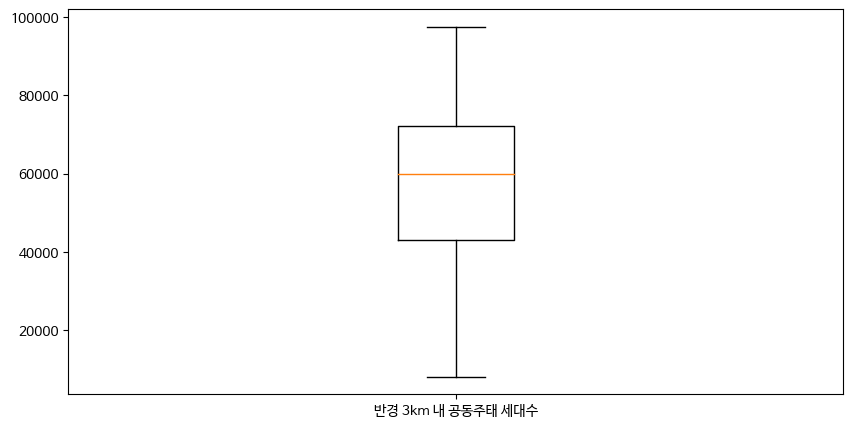

In [ ]:
plt.figure(figsize=(10,5))

plt.boxplot(bank_location[["반경 3km 내 공동주택 세대수"]].values)
plt.xticks([1], ["반경 3km 내 공동주태 세대수"])
plt.show()

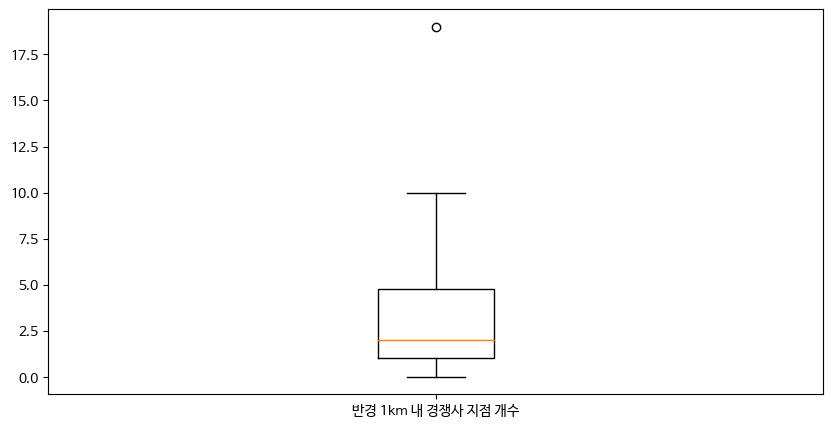

In [ ]:
plt.figure(figsize=(10,5))

plt.boxplot(bank_location[["반경 1km 내 경쟁사 지점 개수"]].values)
plt.xticks([1], ["반경 1km 내 경쟁사 지점 개수"])
plt.show()

**이상치 변환을 하려하였으나 이상치 값들이 오바적으로 크지 않았음**


---
**변환해도 결과에 큰 영향을 끼칠 것 같지 않아 종료**
